Predict the salary based on the job experience with using machine learning.

Example : https://thecleverprogrammer.com/2022/10/31/salary-prediction-with-machine-learning/

Dataset : https://statso.io/salary-prediction-case-study/

Hugging Face : https://huggingface.co/spaces/alperugurcan/Salary-Prediction

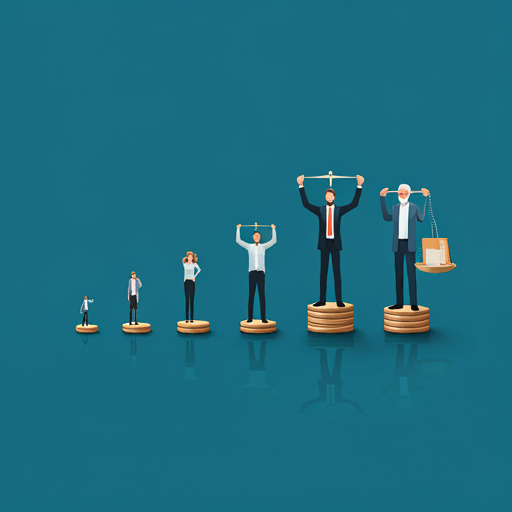

# 1. Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv("Salary_Data.csv")

# 2. Data Analysis

In [21]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.columns)
print(df.isnull().sum())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max         

# 3. Data Visualization


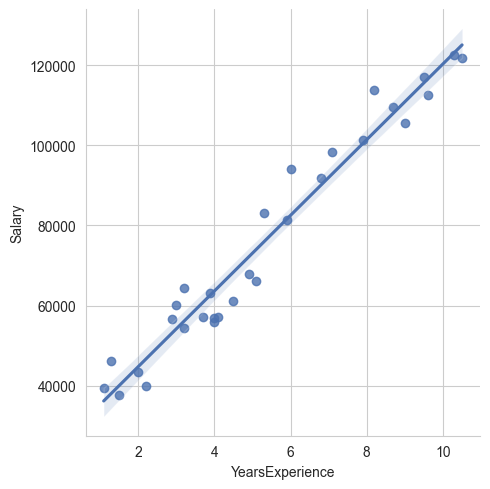

In [19]:
sns.lmplot(x="YearsExperience", y="Salary", data=df);

# 4. Data Augmentation

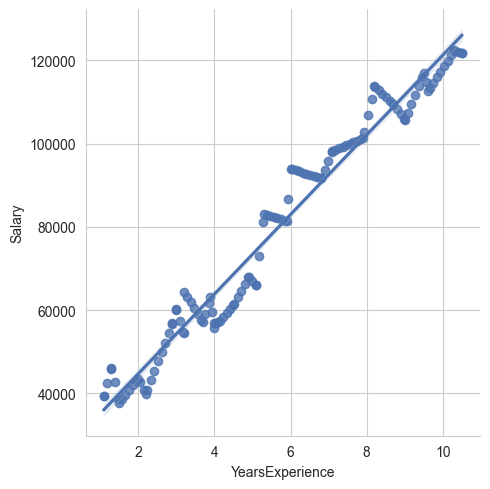

In [34]:
from scipy.interpolate import interp1d

# Interpolasyon fonksiyonunu oluştur
f = interp1d(df['YearsExperience'], df['Salary'], kind='linear', fill_value='extrapolate')

# Yeni veri noktaları oluştur
X_new = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100)
y_new = f(X_new)

# Orijinal ve yeni verileri birleştir
df_augmented = pd.concat([df,pd.DataFrame({'YearsExperience': X_new, 'Salary': y_new})])

# Görselleştirme
sns.lmplot(x='YearsExperience', y='Salary', data=df_augmented);

# 6. Model Training


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_augmented[['YearsExperience']]
y = df_augmented[['Salary']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lmodel = LinearRegression().fit(X_train, y_train)
y_pred = Lmodel.predict(X_test)

print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9650233763404674
4990.236421151307


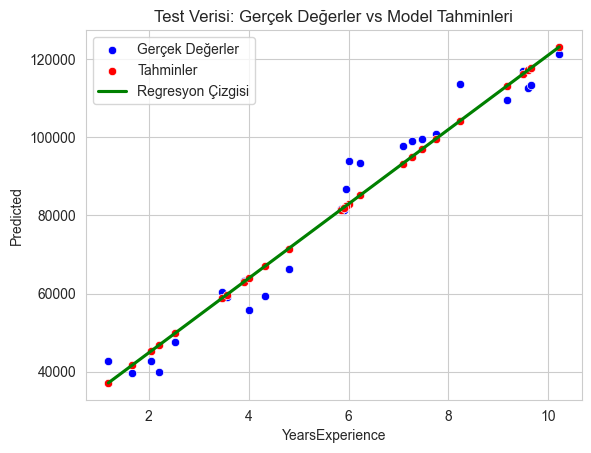

In [74]:
results = pd.DataFrame({
    'YearsExperience': X_test['YearsExperience'].values.flatten(),
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred.flatten()
})

sns.scatterplot(data=results, x='YearsExperience', y='Actual', label='Gerçek Değerler', color='blue')
sns.scatterplot(data=results, x='YearsExperience', y='Predicted', label='Tahminler', color='red')
sns.regplot(data=results, x='YearsExperience', y='Predicted', scatter=False, color='green', label='Regresyon Çizgisi')
plt.title('Test Verisi: Gerçek Değerler vs Model Tahminleri')
plt.legend()

In [85]:
import joblib
joblib.dump(Lmodel, "Salary_Prediction_Model.joblib")

['Salary_Prediction_Model.joblib']